In [94]:
import pandas as pd
import matplotlib.pyplot as plt


In [95]:
df = pd.read_csv('AirPassengers.csv')

In [96]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [97]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [98]:
df['ds'] = pd.to_datetime(df['Month'])

In [99]:
df.head()

,Month,#Passengers,ds
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [100]:
df.drop('Month', inplace=True, axis=1)

In [101]:
df.dtypes

#Passengers             int64
ds             datetime64[ns]
dtype: object

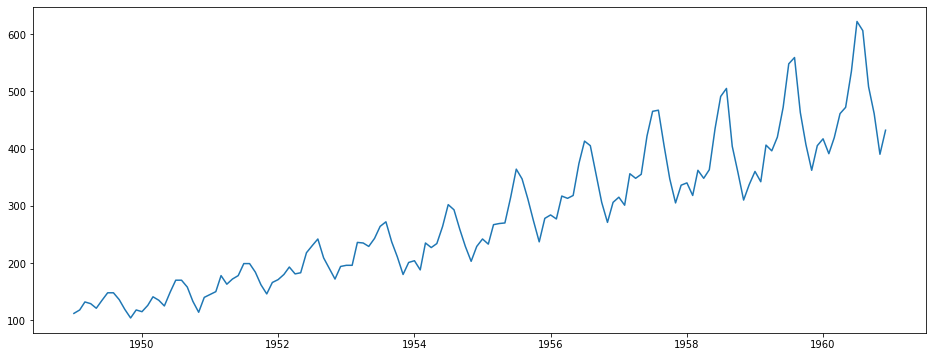

In [102]:
plt.figure(figsize=(16,6))
plt.plot(df.ds, df['#Passengers'])
plt.show()

In [103]:
from neuralprophet import NeuralProphet

In [104]:
df.columns = ['y', 'ds']

In [105]:
df.head()

,y,ds
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


In [106]:
m = NeuralProphet(yearly_seasonality=True ,epochs=1000)
m.fit(df, freq='M')

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.64E-02, min: 1.47E+00


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.21E-01, min: 3.83E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.25E-02
Epoch[1000/1000]: 100%|██████| 1000/1000 [00:36<00:00, 27.53it/s, SmoothL1Loss=0.00158, MAE=16.4, RMSE=21.7, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.478396,337.381683,397.754584,0.0
1,0.466538,331.929504,387.986589,0.0
2,0.455546,326.858819,385.936218,0.0
3,0.444299,321.543742,377.258765,0.0
4,0.433385,316.428055,373.384169,0.0
...,...,...,...,...
995,0.001584,16.408995,21.616714,0.0
996,0.001584,16.408607,21.536085,0.0
997,0.001584,16.408604,21.230986,0.0
998,0.001584,16.408456,21.577704,0.0


In [107]:
future = m.make_future_dataframe(df, periods=24)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


,ds,y,yhat1,residual1,trend,season_yearly
0,1960-12-31,None,482.007996,NaN,506.103302,-24.095291
1,1961-01-31,None,469.381073,NaN,510.562439,-41.181347
2,1961-02-28,None,512.839172,NaN,514.590027,-1.750818
3,1961-03-31,None,508.478912,NaN,519.049194,-10.570274
4,1961-04-30,None,520.972107,NaN,523.364441,-2.392302


In [108]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly
19,1962-07-31,None,662.386475,NaN,589.100708,73.285820
20,1962-08-31,None,616.493347,NaN,593.559814,22.933506
21,1962-09-30,None,571.177002,NaN,597.875122,-26.698092
22,1962-10-31,None,542.179688,NaN,602.334229,-60.154530
23,1962-11-30,None,564.383789,NaN,606.649536,-42.265762


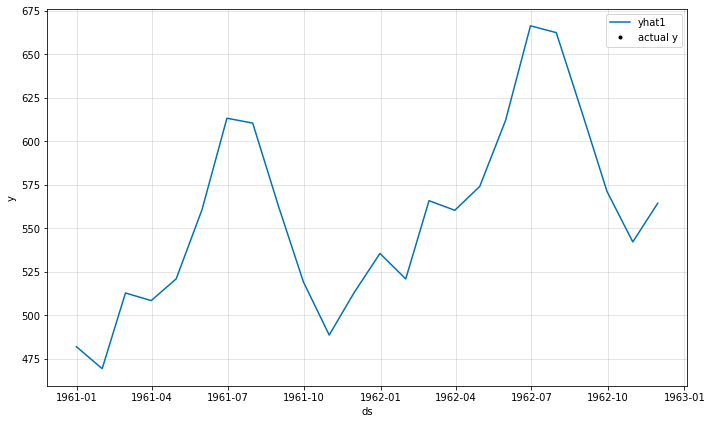

In [109]:
m.plot(forecast);

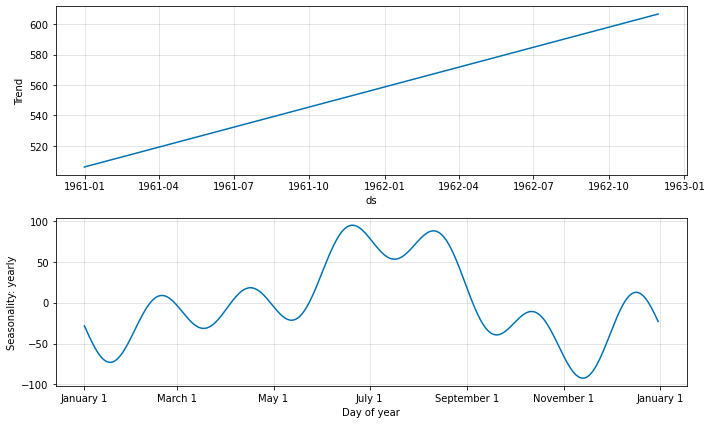

In [110]:
plot2 = m.plot_components(forecast)